# MITgcm ECCOv4 Example
## http://gallery.pangeo.io/repos/pangeo-gallery/physical-oceanography/04_eccov4.html

In [1]:
import xarray as xr
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from dask.diagnostics import ProgressBar

In [3]:
import sys
sys.path.append('/home/jovyan/ECCOv4-py/ECCOv4-py')

import ecco_v4_py as ecco

In [4]:
import os
base_dir = os.getcwd()

## Connect to Dask Cluster

In [5]:
from dask_gateway import Gateway, GatewayCluster
gateway = Gateway()

In [6]:
gateway.list_clusters()

[]

In [8]:
cluster = GatewayCluster()
# cluster.adapt(minimum=2, maximum=10)  # or cluster.scale(n) to a fixed size.
cluster.adapt(minimum=2, maximum=50)  # or cluster.scale(n) to a fixed size.
client = cluster.get_client()

In [9]:
gateway

Gateway<http://10.39.245.173:8000/services/dask-gateway>

In [10]:
cluster

In [11]:
client

<Client: 'tls://10.38.191.223:8786' processes=0 threads=0, memory=0 B>

In [7]:
for cl in gateway.list_clusters():
    c = gateway.connect(cl.name)
    c.close()

## Connect to data

In [5]:
# Constants
rho0 = 1029 #kg/m^3
cp = 3994 # J/Kg/K

In [6]:
import intake
cat = intake.open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds = cat.ECCOv4r3.to_dask()
# ds

In [11]:
ds

<xarray.Dataset>
Dimensions:    (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
    Depth      (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC     (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    XC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zp1        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    Zu         (k_u) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    drC        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    drF        (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    dxC        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dxG        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dyC        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dyG        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    hFacC      (k, face, j, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    hFacS      (k, face, j_g, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    hFacW      (k, face, j, i_g) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    iter_snp   (time_snp) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    rA         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAs        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAw        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz        (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
Data variables:
    ADVr_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH    (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFrE_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFrE_TH    (time, k_l, face, j, i) float32 das

In [15]:
ds.THETA

<xarray.DataArray 'THETA' (time: 288, k: 50, face: 13, j: 90, i: 90)>
dask.array<xarray-THETA, shape=(288, 50, 13, 90, 90), dtype=float32, chunksize=(1, 50, 13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
    Depth    (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC   (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    XC       (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC       (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z        (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    drF      (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    hFacC    (k, face, j, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    rA       (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
Attributes:
    long_name:      Potential Temperature
    standard_name:  THETA
    units:          degC

In [16]:
# a trick to make things work a bit faster
coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)

In [17]:
from matplotlib import pyplot as plt
import cartopy as cart
import pyresample

class LLCMapper:

    def __init__(self, ds, dx=0.25, dy=0.25):
        # Extract LLC 2D coordinates
        lons_1d = ds.XC.values.ravel()
        lats_1d = ds.YC.values.ravel()

        # Define original grid
        self.orig_grid = pyresample.geometry.SwathDefinition(lons=lons_1d, lats=lats_1d)

        # Longitudes latitudes to which we will we interpolate
        lon_tmp = np.arange(-180, 180, dx) + dx/2
        lat_tmp = np.arange(-90, 90, dy) + dy/2

        # Define the lat lon points of the two parts.
        self.new_grid_lon, self.new_grid_lat = np.meshgrid(lon_tmp, lat_tmp)
        self.new_grid  = pyresample.geometry.GridDefinition(lons=self.new_grid_lon,
                                                            lats=self.new_grid_lat)

    def __call__(self, da, ax=None, projection=cart.crs.Robinson(), lon_0=-60, **plt_kwargs):

        assert set(da.dims) == set(['face', 'j', 'i']), "da must have dimensions ['face', 'j', 'i']"

        if ax is None:
            fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})
        else:
            m = plt.axes(projection=projection)

        field = pyresample.kd_tree.resample_nearest(self.orig_grid, da.values,
                                                    self.new_grid,
                                                    radius_of_influence=100000,
                                                    fill_value=None)

        vmax = plt_kwargs.pop('vmax', field.max())
        vmin = plt_kwargs.pop('vmin', field.min())


        x,y = self.new_grid_lon, self.new_grid_lat

        # Find index where data is splitted for mapping
        split_lon_idx = round(x.shape[1]/(360/(lon_0 if lon_0>0 else lon_0+360)))


        p = ax.pcolormesh(x[:,:split_lon_idx], y[:,:split_lon_idx], field[:,:split_lon_idx],
                         vmax=vmax, vmin=vmin, transform=cart.crs.PlateCarree(), zorder=1, **plt_kwargs)
        p = ax.pcolormesh(x[:,split_lon_idx:], y[:,split_lon_idx:], field[:,split_lon_idx:],
                         vmax=vmax, vmin=vmin, transform=cart.crs.PlateCarree(), zorder=2, **plt_kwargs)

        ax.add_feature(cart.feature.LAND, facecolor='0.5', zorder=3)
        label = ''
        if da.name is not None:
            label = da.name
        if 'units' in da.attrs:
            label += ' [%s]' % da.attrs['units']
        cb = plt.colorbar(p, shrink=0.4, label=label)
        return ax

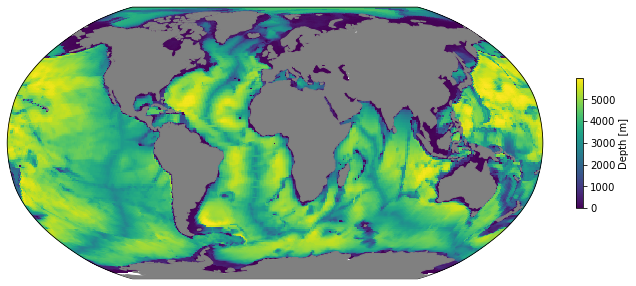

In [18]:
mapper = LLCMapper(coords)
mapper(coords.Depth);

# Spatially-integrated heat content

In [60]:
# the monthly climatology
# theta_clim = ds.THETA.groupby('time.month').mean(dim='time')
# theta_clim = ds.THETA.groupby('time.season').mean(dim='time')
# the anomaly
# theta_anom = ds.THETA.groupby('time.month') - theta_clim
# theta_anom = ds.THETA.groupby('time.season') - theta_clim
rho0 = 1029
cp = 3994
# ohc = rho0 * cp * (theta_anom *
#                    coords.rA *
#                    coords.hFacC).sum(dim=['face', 'j', 'i'])
ohc50 = rho0 * cp * (ds.THETA.isel(k=slice(5)) *
#                    coords.rA *
                     coords.drF *
                   coords.hFacC).sum(dim='k')
ohc300 = rho0 * cp * (ds.THETA.isel(k=slice(20)) *
#                    coords.rA *
                     coords.drF *
                   coords.hFacC).sum(dim='k')

In [62]:
ohc50.load()
ohc50.to_netcdf('ohc_50.nc')
ohc300.load()
ohc300.to_netcdf('ohc_300.nc')

(<Figure size 648x568.08 with 17 Axes>,
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

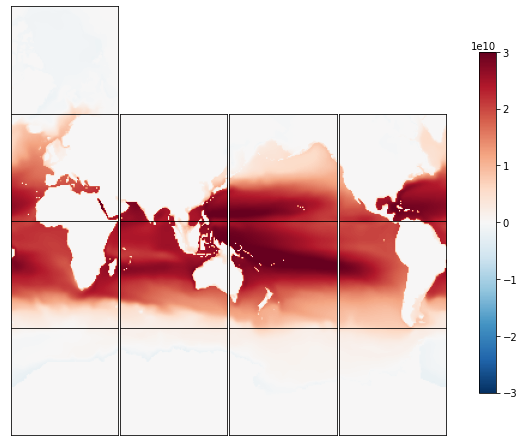

In [61]:
ecco.plot_tiles(ohc300.isel(time=100).rename({'face':'tile'}),layout='latlon',rotate_to_latlon=True,show_tile_labels=False,show_colorbar=True,cmax=3e10,cmin=-3e10)

# Spatially-integrated heat content anomaly

In [21]:
# the monthly climatology
theta_clim = ds.THETA.groupby('time.month').mean(dim='time')
# theta_clim = ds.THETA.groupby('time.season').mean(dim='time')
# the anomaly
theta_anom = ds.THETA.groupby('time.month') - theta_clim
# theta_anom = ds.THETA.groupby('time.season') - theta_clim
rho0 = 1029
cp = 3994
# ohc = rho0 * cp * (theta_anom *
#                    coords.rA *
#                    coords.hFacC).sum(dim=['face', 'j', 'i'])
ohc = rho0 * cp * (theta_anom *
                   coords.rA *
                   coords.hFacC).sum(dim='k')

<GeoAxesSubplot:>

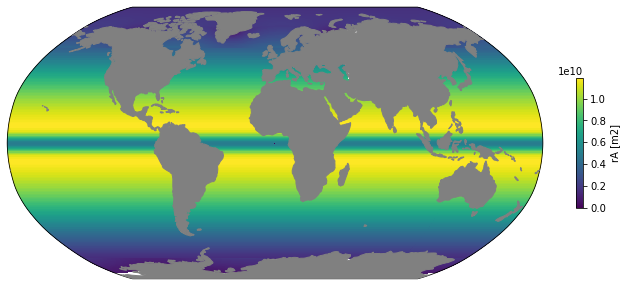

In [33]:
mapper(coords.rA)

In [32]:
# Subsample Atlantic
# not sure how
# Subsample Januarys of interest
# ohcNA = ohc.sel(time=['2011-01-15','2012-01-15','2013-01-15','2014-01-15','2015-01-15'])
ohcNA = ohc.sel(time=slice('2011','2015'))
ohcNA = ohcNA[ohcNA['time.month']==1]

In [34]:
ohcNA.load()

<xarray.DataArray (time: 5, face: 13, j: 90, i: 90)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 1.12718844e+17,  1.12613801e+17,  1.14449161e+17, ...,
          -5.84032067e+16, -5.96904026e+16, -6.21702767e+16],
         [ 1.12047981e+17,  1.13813120e+17,  1.14922487e+17, ...,
          -6.08638986e+16, -6.38976566e+16, -7.02824403e+16],
         [ 1.04977303e+17,  1.09276995e+17,  1.10265824e+17, ...,
          -6.60045305e+16, -7.05535873e+16, -7.86845586e+16]],

        [[ 9.37271499e+16,  1.00007833e+17,  1.02187572e+17, ...,
          -7.55263689e+16, -7.96097553e+16, -8.60629938e+16],
         [ 8.40231608e+16,  9.25942404e+16,  9.57900958e+16, ...,
          -8.71043945e+16, -8.90922783e+16, -9.22709043e+16],
         [ 8.21990872e+16,  9.63924950e+16,  8.84160206e+16, ...,
          -1.01685048e+17, -1.01257123e+17, -1.01570368e+17],
...
         [-3.45662854e+17, -3.17575579e+17, -3.20014400e+17, ...,
          -2.62295855e+16, -7.08378552e+15,  1.44215496e+16],
         [-4.08220864e+17, -3.62128915e+17, -3.43046234e+17, ...,
          -1.74596424e+16,  7.18412446e+14,  2.40546882e+16],
         [-4.68666564e+17, -4.08024481e+17, -3.70633173e+17, ...,
          -3.94298179e+15,  1.16207530e+16,  3.65774840e+16]],

        [[-1.08993244e+17, -1.03409120e+17, -8.63121600e+16, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-5.47429055e+16, -5.51047658e+16, -4.20010508e+16, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-1.50860047e+16, -1.65890042e+16, -4.71398331e+15, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 3.70088303e+16,  6.04195944e+16,  8.44043717e+16, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 4.95493606e+16,  7.41887767e+16,  9.32797399e+16, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 6.32261376e+16,  8.44985486e+16,  9.58782883e+16, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]]])
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * time     (time) datetime64[ns] 2011-01-15 2012-01-15 ... 2015-01-15
    month    (time) int64 1 1 1 1 1

In [15]:
# actually load the data
ohc.load()


<xarray.DataArray (time: 288, face: 13, j: 90, i: 90)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-2.30920678e+16, -1.54985350e+16, -1.08028427e+16, ...,
           1.44705771e+16,  1.12691182e+16,  8.69230487e+15],
         [-9.61679609e+15, -3.52804876e+15,  1.68130233e+15, ...,
           1.09329610e+16,  6.49057337e+15,  3.01617487e+15],
         [ 2.35955040e+15,  7.92137148e+15,  1.44737766e+16, ...,
           7.36596420e+14, -3.46633772e+15, -7.77055441e+15]],

        [[ 1.33273159e+16,  1.94139690e+16,  2.79942861e+16, ...,
          -1.26083549e+16, -1.70413171e+16, -2.34998088e+16],
         [ 2.51250958e+16,  3.42364977e+16,  4.51352649e+16, ...,
          -2.74840522e+16, -3.25494958e+16, -4.18226373e+16],
         [ 4.23451136e+16,  5.32948411e+16,  6.69339693e+16, ...,
          -4.61298128e+16, -5.20908507e+16, -6.31591894e+16],
...
         [-1.82095026e+17, -1.17252679e+17, -1.29317842e+17, ...,
          -1.97986211e+17, -1.67701514e+17, -1.40199519e+17],
         [-2.60480270e+17, -1.90018044e+17, -1.83366537e+17, ...,
          -1.77338067e+17, -1.49577908e+17, -1.26675450e+17],
         [-3.32857582e+17, -2.49775761e+17, -2.26601008e+17, ...,
          -1.61863148e+17, -1.37139336e+17, -1.18655931e+17]],

        [[ 1.14369632e+16,  6.17248320e+16,  1.29119169e+17, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 5.76349057e+16,  9.99758908e+16,  1.52172576e+17, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 9.24991628e+16,  1.24871787e+17,  1.62263205e+17, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-1.13154108e+17, -8.96132606e+16, -7.25845363e+16, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-1.01828515e+17, -8.01456608e+16, -6.63306147e+16, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-9.68294848e+16, -7.61129359e+16, -6.17609532e+16, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]]])
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
    season   (time) <U3 'DJF' 'DJF' 'MAM' 'MAM' ... 'SON' 'SON' 'SON' 'DJF'

Text(0.5, 1.0, '2011-01-15T00:00:00.000000000')

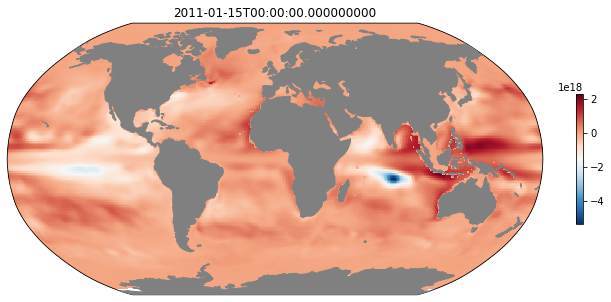

In [38]:
mapper(ohcNA.isel(time=0),cmap='RdBu_r')
plt.title(ohcNA.isel(time=0).time.values)

Text(0.5, 1.0, '2012-01-15T00:00:00.000000000')

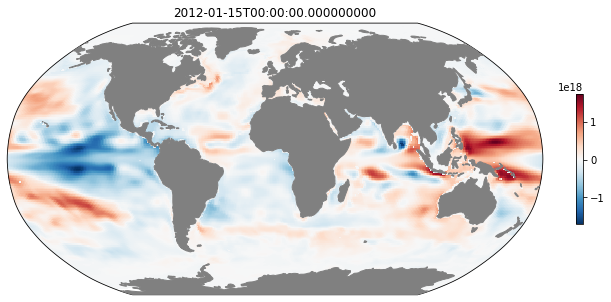

In [39]:
mapper(ohcNA.isel(time=1),cmap='RdBu_r')
plt.title(ohcNA.isel(time=1).time.values)

Text(0.5, 1.0, '2013-01-15T00:00:00.000000000')

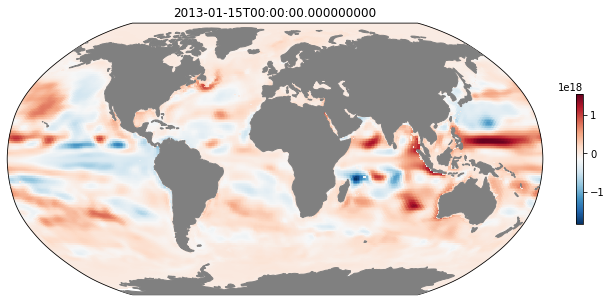

In [40]:
mapper(ohcNA.isel(time=2),cmap='RdBu_r')
plt.title(ohcNA.isel(time=2).time.values)

Text(0.5, 1.0, '2014-01-15T00:00:00.000000000')

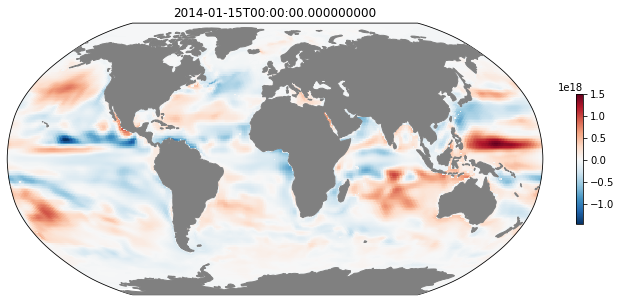

In [41]:
mapper(ohcNA.isel(time=3),cmap='RdBu_r')
plt.title(ohcNA.isel(time=3).time.values)

Text(0.5, 1.0, '2015-01-15T00:00:00.000000000')

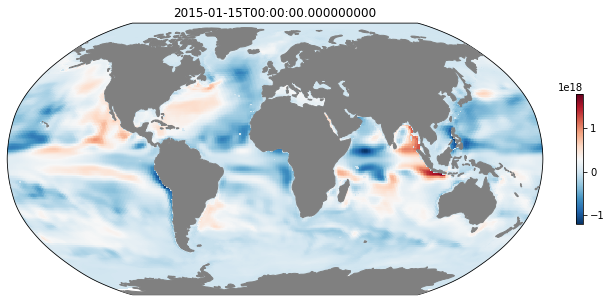

In [42]:
mapper(ohcNA.isel(time=4),cmap='RdBu_r')
plt.title(ohcNA.isel(time=4).time.values)

# Spatial derivatives: Heat budget

In [19]:
import xgcm

# define the connectivity between faces
face_connections = {'face':
                    {0: {'X':  ((12, 'Y', False), (3, 'X', False)),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((11, 'Y', False), (4, 'X', False)),
                         'Y':  ((0, 'Y', False),  (2, 'Y', False))},
                     2: {'X':  ((10, 'Y', False), (5, 'X', False)),
                         'Y':  ((1, 'Y', False),  (6, 'X', False))},
                     3: {'X':  ((0, 'X', False),  (9, 'Y', False)),
                         'Y':  (None,             (4, 'Y', False))},
                     4: {'X':  ((1, 'X', False),  (8, 'Y', False)),
                         'Y':  ((3, 'Y', False),  (5, 'Y', False))},
                     5: {'X':  ((2, 'X', False),  (7, 'Y', False)),
                         'Y':  ((4, 'Y', False),  (6, 'Y', False))},
                     6: {'X':  ((2, 'Y', False),  (7, 'X', False)),
                         'Y':  ((5, 'Y', False),  (10, 'X', False))},
                     7: {'X':  ((6, 'X', False),  (8, 'X', False)),
                         'Y':  ((5, 'X', False),  (10, 'Y', False))},
                     8: {'X':  ((7, 'X', False),  (9, 'X', False)),
                         'Y':  ((4, 'X', False),  (11, 'Y', False))},
                     9: {'X':  ((8, 'X', False),  None),
                         'Y':  ((3, 'X', False),  (12, 'Y', False))},
                     10: {'X': ((6, 'Y', False),  (11, 'X', False)),
                          'Y': ((7, 'Y', False),  (2, 'X', False))},
                     11: {'X': ((10, 'X', False), (12, 'X', False)),
                          'Y': ((8, 'Y', False),  (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False),  (0, 'X', False))}}}

# create the grid object
grid = xgcm.Grid(ds, periodic=False, face_connections=face_connections)
grid

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
Z Axis (not periodic, boundary=None):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
T Axis (not periodic, boundary=None):
  * center   time --> inner
  * inner    time_snp --> center

## Full depth anomalies

In [44]:
# Monthly anomaly of heat convergence, relative to whole time period

# Advection

# vertical integral and time mean of horizontal advective heat flux
advx_th_vint_clim = ds.ADVx_TH.sum(dim='k').groupby('time.month').mean(dim='time')
advy_th_vint_clim = ds.ADVy_TH.sum(dim='k').groupby('time.month').mean(dim='time')

advx_th_vint_anom = ds.ADVx_TH.sum(dim='k').groupby('time.month') - advx_th_vint_clim
advy_th_vint_anom = ds.ADVy_TH.sum(dim='k').groupby('time.month') - advy_th_vint_clim

# difference in the x and y directions
diff_ADV_th_anom = grid.diff_2d_vector({'X': advx_th_vint_anom, 'Y': advy_th_vint_anom}, boundary='fill')
# convergence
conv_ADV_th_anom = -diff_ADV_th_anom['X'] - diff_ADV_th_anom['Y']

# Diffusion

# vertical integral and time mean of horizontal diffusive heat flux
difx_th_vint_clim = ds.DFxE_TH.sum(dim='k').groupby('time.month').mean(dim='time')
dify_th_vint_clim = ds.DFyE_TH.sum(dim='k').groupby('time.month').mean(dim='time')

difx_th_vint_anom = ds.DFxE_TH.sum(dim='k').groupby('time.month') - difx_th_vint_clim
dify_th_vint_anom = ds.DFyE_TH.sum(dim='k').groupby('time.month') - dify_th_vint_clim

# difference in the x and y directions
diff_DIF_th_anom = grid.diff_2d_vector({'X': difx_th_vint_anom, 'Y': dify_th_vint_anom}, boundary='fill')
# convergence
conv_DIF_th_anom = -diff_DIF_th_anom['X'] - diff_DIF_th_anom['Y']


# Select 2011-2015, January only
conv_ADV_th_anom_NA = conv_ADV_th_anom.sel(time=slice('2011','2015'))
conv_ADV_th_anom_NA = conv_ADV_th_anom_NA[conv_ADV_th_anom_NA['time.month']==1]

conv_DIF_th_anom_NA = conv_DIF_th_anom.sel(time=slice('2011','2015'))
conv_DIF_th_anom_NA = conv_DIF_th_anom_NA[conv_DIF_th_anom_NA['time.month']==1]

# Add advection and diffusion to horizontal heat flux
conv_circ_th_anom_NA = conv_ADV_th_anom_NA + conv_DIF_th_anom_NA
conv_circ_th_anom_NA_Wm2 = rho0 * cp * (conv_circ_th_anom_NA/coords.rA).fillna(0.).load()

## NA timeseries of horizontal heat convergence, over depth

In [23]:
tt = ds.ADVx_TH.where(coords.XC>-50).where(coords.XC<-10).where(coords.YC>40).where(coords.YC<60)#.sum(dim=['i','j'])

In [25]:
# Monthly anomaly of heat convergence, relative to whole time period

# Advection

advx_th_NA = ds.ADVx_TH.where(coords.XC>-50).where(coords.XC<-10).where(coords.YC>40).where(coords.YC<60)#.sum(dim=['i','j'])
advy_th_NA = ds.ADVy_TH.where(coords.XC>-50).where(coords.XC<-10).where(coords.YC>40).where(coords.YC<60)#.sum(dim=['i','j'])

# difference in the x and y directions
diff_ADV_th_NA = grid.diff_2d_vector({'X': advx_th_NA, 'Y': advy_th_NA}, boundary='fill')
# convergence
conv_ADV_th_NA = -diff_ADV_th_NA['X'] - diff_ADV_th_NA['Y']

# Diffusion

# vertical integral and time mean of horizontal diffusive heat flux
difx_th_vint_NA = ds.DFxE_TH.where(coords.XC>-50).where(coords.XC<-10).where(coords.YC>40).where(coords.YC<60)#.sum(dim=['i','j'])
dify_th_vint_NA = ds.DFyE_TH.where(coords.XC>-50).where(coords.XC<-10).where(coords.YC>40).where(coords.YC<60)#.sum(dim=['i','j'])

# difference in the x and y directions
diff_DIF_th_NA = grid.diff_2d_vector({'X': difx_th_vint_NA, 'Y': dify_th_vint_NA}, boundary='fill')
# convergence
conv_DIF_th_NA = -diff_DIF_th_NA['X'] - diff_DIF_th_NA['Y']

# Sum horizontally
conv_ADVh_th_NA_z = conv_ADV_th_NA.sum(['i','j'])
conv_DIFh_th_NA_z = conv_DIF_th_NA.sum(['i','j'])

# Add advection and diffusion to horizontal heat flux
conv_circh_th_NA_z = conv_ADVh_th_NA_z + conv_DIFh_th_NA_z
# conv_circ_th_anom_NA_Wm2 = rho0 * cp * (conv_circ_th_anom_NA/coords.rA).fillna(0.).load()

NotImplementedError: Only vector interpolation to cell center is implemented, but vector X component is defined at center (dims: ('time', 'k', 'face', 'j', 'i_g', 'i'))

# Global 4D heat convergence

## Global timeseries of horizontal heat convergence, over depth

In [20]:
# Monthly anomaly of heat convergence, relative to whole time period

# Advection

advx_th = ds.ADVx_TH.sel(time=slice('2005','2015'))
advy_th = ds.ADVy_TH.sel(time=slice('2005','2015'))

# difference in the x and y directions
diff_ADV_th = grid.diff_2d_vector({'X': advx_th, 'Y': advy_th}, boundary='fill')
# convergence
conv_ADV_th = -diff_ADV_th['X'] - diff_ADV_th['Y']

# Diffusion

# vertical integral and time mean of horizontal diffusive heat flux
difx_th = ds.DFxE_TH.sel(time=slice('2005','2015'))
dify_th = ds.DFyE_TH.sel(time=slice('2005','2015'))

# difference in the x and y directions
diff_DIF_th = grid.diff_2d_vector({'X': difx_th, 'Y': dify_th}, boundary='fill')
# convergence
conv_DIF_th = -diff_DIF_th['X'] - diff_DIF_th['Y']

# Sum horizontally
conv_ADVh_th_z = conv_ADV_th#.sum(['i','j'])
conv_DIFh_th_z = conv_DIF_th#.sum(['i','j'])

# Add advection and diffusion to horizontal heat flux [K.m^3/s]
conv_circh_th_z = conv_ADVh_th_z + conv_DIFh_th_z
# conv_circ_th_anom_NA_Wm2 = rho0 * cp * (conv_circ_th_anom_NA/coords.rA).fillna(0.).load()

In [46]:
conv_circh_th_NA_z

<xarray.DataArray (time: 132, k: 50, face: 13, j: 90, i: 90)>
dask.array<add, shape=(132, 50, 13, 90, 90), dtype=float32, chunksize=(1, 50, 1, 89, 89), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2005-01-15 2005-02-12 ... 2015-12-14
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [50]:
conv_circh_th_NA_z.load()

<xarray.DataArray (time: 132, k: 50, face: 13, j: 90, i: 90)>
array([[[[[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
          [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
          [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
          ...,
          [ 2.86826348e+04,  8.17266113e+03,  2.14944707e+04, ...,
            3.50782568e+03,  5.54191602e+03,  3.32918311e+03],
          [-5.70265381e+03,  2.25389746e+04,  3.62768984e+04, ...,
           -2.62399902e+02, -1.53269617e+03,  4.79707617e+03],
          [-2.21961387e+04, -2.15704629e+04, -5.82451836e+04, ...,
           -1.88471985e+02,  8.77902466e+02, -3.33260156e+03]],

         [[ 3.01621035e+04, -1.52483584e+04, -1.02694109e+05, ...,
            5.96754736e+03,  1.03584473e+04,  1.65028828e+04],
          [ 1.11142656e+04, -2.05717480e+04, -1.14115031e+05, ...,
            1.23193701e+04,  1.26695273e+04,  2.16688359e+04],
          [ 2.92383203e+03, -1.52809109e+05, -7.98789111e+03, ...,
            2.99804414e+04,  2.30195762e+04,  7.62917285e+03],
...
           -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
          [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
          [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]],

         [[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
          [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
          [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
          ...,
          [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
          [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
          [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2005-01-15 2005-02-12 ... 2015-12-14
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [51]:
conv_circh_th_NA_z.to_netcdf('conv_circh_4D_2005-2015.nc')

## Vertical heat transport

In [19]:
# Advective vertical heat transport at 300 m
ADVr_th = ds.ADVr_TH
# Diffusive vertical heat transport at 300 m
DFr_th = ds.DFrE_TH + ds.DFrI_TH

# Total vertical transport [K.m^3/s]
heat_trans_vert = DFr_th + ADVr_th

# heat_trans_vert_Wm2 = rho0 * cp * (heat_trans_vert/coords.rA).fillna(0.).load()

In [24]:
heat_trans_vert

<xarray.DataArray (time: 288, k_l: 50, face: 13, j: 90, i: 90)>
dask.array<add, shape=(288, 50, 13, 90, 90), dtype=float32, chunksize=(1, 50, 13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14

In [25]:
heat_trans_vert.load()

<xarray.DataArray (time: 288, k_l: 50, face: 13, j: 90, i: 90)>
array([[[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          ...,
          [-1.88768579e-09,  1.71872017e-09,  9.70048597e-10, ...,
            4.40620296e-09,  3.72711056e-10,  7.14838233e-09],
          [ 1.68000269e-09, -6.62437466e-11,  2.74212297e-09, ...,
            2.41783660e-09, -1.37160650e-09, -2.72179085e-10],
          [ 7.96031596e-09,  1.20140866e-08,  7.37688666e-09, ...,
            7.01512981e-09, -2.20276508e-09, -9.68520641e-09]],

         [[-7.97091992e-09, -1.01819211e-08,  1.52134971e-09, ...,
           -1.92153005e-09, -5.40692779e-09, -8.26889934e-09],
          [ 6.72958933e-09, -1.45428714e-09,  4.10006695e-09, ...,
            3.68143227e-09, -2.48265142e-08,  7.42522666e-09],
          [-2.20239091e-10, -5.26426636e-09,  8.80678286e-09, ...,
           -2.67251732e-09, -1.39119427e-08,  3.32077366e-09],
...
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

         [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          ...,
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]]]],
      dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14

In [26]:
heat_trans_vert.to_netcdf('circv_4D_2005-2015.nc')

## Vertical heat convergence

In [21]:
heat_trans_vert = xr.open_dataarray('circv_4D_2005-2015.nc')

In [20]:
conv_circv_th_z = grid.diff(heat_trans_vert,'Z',boundary='fill')

In [21]:
conv_circv_th_z

<xarray.DataArray 'sub-6a082a9b080afc0014bef55f9fcfb07f' (time: 288, k: 50, face: 13, j: 90, i: 90)>
dask.array<sub, shape=(288, 50, 13, 90, 90), dtype=float32, chunksize=(1, 49, 13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [23]:
1

1

In [24]:
conv_circv_th_z.load()

<xarray.DataArray 'sub-6a082a9b080afc0014bef55f9fcfb07f' (time: 288, k: 50, face: 13, j: 90, i: 90)>
array([[[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          ...,
          [-2.67910352e+03, -4.41501328e+04, -4.34281133e+04, ...,
            2.48643359e+03, -1.03420938e+04, -2.56719023e+04],
          [-4.55162383e+04, -6.96547344e+04, -8.28106250e+04, ...,
           -3.55187344e+04, -1.95978867e+04, -1.60510918e+04],
          [-1.13631484e+05, -1.09790750e+05, -1.18406906e+05, ...,
           -4.28813164e+04, -4.03203164e+04, -3.20017500e+04]],

         [[-9.48048906e+04, -5.73182422e+04, -3.33379570e+04, ...,
           -6.33253320e+04, -6.54645078e+04, -6.10691914e+04],
          [-6.51570859e+04, -1.52713984e+04, -1.90621992e+04, ...,
           -1.07045938e+05, -1.07354062e+05, -1.02195719e+05],
          [-5.70003711e+04,  3.37094531e+04, -5.31715625e+04, ...,
           -7.47348516e+04, -6.91882188e+04, -6.25924453e+04],
...
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

         [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          ...,
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [27]:
conv_circv_th_z.rename('conv_circv').to_netcdf('conv_circv_4D_1992-2015.nc')

# ===============

In [33]:
ds.DFxE_TH.where(coords.XG>-50).where(coords.XG<-10).where(coords.YC>40).where(coords.YC<60)#.sum(dim=['i','j'])

<xarray.DataArray 'DFxE_TH' (time: 288, k: 50, face: 13, j: 90, i_g: 90, j_g: 90, i: 90)>
dask.array<where, shape=(288, 50, 13, 90, 90, 90, 90), dtype=float32, chunksize=(1, 50, 13, 90, 90, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
Attributes:
    long_name:      Zonal      Diffusive Flux of Pot.Temperature
    mate:           DFyE_TH
    standard_name:  DFxE_TH
    units:          degC.m^3/s

In [29]:
ds.DFxE_TH

<xarray.DataArray 'DFxE_TH' (time: 288, k: 50, face: 13, j: 90, i_g: 90)>
dask.array<xarray-DFxE_TH, shape=(288, 50, 13, 90, 90), dtype=float32, chunksize=(1, 50, 13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
Attributes:
    long_name:      Zonal      Diffusive Flux of Pot.Temperature
    mate:           DFyE_TH
    standard_name:  DFxE_TH
    units:          degC.m^3/s

## Anomalies
## top 300m: top 20 cells
## top 50m: top 5 cells

# Full depth convergence

In [16]:
# Monthly timeseries of heat convergence

# Advection

# vertical integral and time mean of horizontal advective heat flux
advx_th_vint = ds.ADVx_TH.sum(dim='k')
advy_th_vint = ds.ADVy_TH.sum(dim='k')

# difference in the x and y directions
diff_ADV_th = grid.diff_2d_vector({'X': advx_th_vint, 'Y': advy_th_vint}, boundary='fill')
# convergence
conv_ADV_th = -diff_ADV_th['X'] - diff_ADV_th['Y']

# Diffusion

# vertical integral and time mean of horizontal diffusive heat flux
difx_th_vint = ds.DFxE_TH.sum(dim='k')
dify_th_vint = ds.DFyE_TH.sum(dim='k')

# difference in the x and y directions
diff_DIF_th = grid.diff_2d_vector({'X': difx_th_vint, 'Y': dify_th_vint}, boundary='fill')
# convergence
conv_DIF_th = -diff_DIF_th['X'] - diff_DIF_th['Y']

# Add advection and diffusion to horizontal heat flux
conv_circ_th = conv_ADV_th + conv_DIF_th
conv_circ_th_Wm2 = rho0 * cp * (conv_circ_th/coords.rA).fillna(0.).load()

In [35]:
with ProgressBar():
#     conv_circ_th_Wm2.to_zarr('/eccov4r3_heat_conv_integ')
    conv_circ_th_Wm2.to_netcdf(base_dir + '/eccov4r3_heat_conv_integ.nc')
#     ds_out.to_zarr(mapper)

## top 300m: top 20 cells
## top 50m: top 5 cells

In [19]:
# kmax = 5 # top 50 meter

kmax = 20 # top 300 meter

# Monthly timeseries of heat convergence

# Advection

# vertical integral and time mean of horizontal advective heat flux
advx_th_vint = ds.ADVx_TH.isel(k=slice(kmax)).sum(dim='k')
advy_th_vint = ds.ADVy_TH.isel(k=slice(kmax)).sum(dim='k')

# difference in the x and y directions
diff_ADV_th = grid.diff_2d_vector({'X': advx_th_vint, 'Y': advy_th_vint}, boundary='fill')
# convergence
conv_ADV_th = -diff_ADV_th['X'] - diff_ADV_th['Y']

# Diffusion

# vertical integral and time mean of horizontal diffusive heat flux
difx_th_vint = ds.DFxE_TH.isel(k=slice(kmax)).sum(dim='k')
dify_th_vint = ds.DFyE_TH.isel(k=slice(kmax)).sum(dim='k')

# difference in the x and y directions
diff_DIF_th = grid.diff_2d_vector({'X': difx_th_vint, 'Y': dify_th_vint}, boundary='fill')
# convergence
conv_DIF_th = -diff_DIF_th['X'] - diff_DIF_th['Y']

# Add advection and diffusion to horizontal heat flux
conv_circ_th = conv_ADV_th + conv_DIF_th
conv_circ_th_Wm2 = rho0 * cp * (conv_circ_th/coords.rA).fillna(0.).load()

KeyboardInterrupt: 

In [31]:
conv_circ_th_Wm2.load()

<xarray.DataArray (time: 288, face: 13, j: 90, i: 90)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-3.42232974e+01, -1.67192046e+01, -5.07566628e+01, ...,
          -1.17592933e+01, -1.05472326e+01, -1.31564054e+01],
         [-3.98105570e+01, -1.19378175e+01, -3.60629437e+01, ...,
          -1.86453937e+01, -1.75969376e+01, -1.77533840e+01],
         [-2.27651975e+01, -7.39314742e+00, -3.64739593e+01, ...,
          -1.80060917e+01, -2.10900658e+01, -2.26693156e+01]],

        [[-7.34429143e-01,  4.55030721e+00, -4.89702774e+01, ...,
          -1.64875934e+01, -1.56468149e+01, -1.38119802e+01],
         [ 1.67675745e+01,  1.28435012e+01, -6.72986590e+01, ...,
          -1.90403851e+01, -1.73229128e+01, -1.30068870e+01],
         [ 1.75306129e+01,  6.65064952e+00, -6.78707766e+01, ...,
          -2.12672687e+01, -1.70804356e+01, -1.67252768e+01],
...
         [ 2.77285379e+02,  2.02450123e+02,  8.89198082e+01, ...,
           1.23312464e+01,  7.00624242e+00, -1.20379969e+01],
         [ 2.65176162e+02,  2.03410381e+02,  1.09745659e+02, ...,
           2.96536976e+01,  2.54114470e+01,  2.72940003e+01],
         [ 2.68505284e+02,  2.14255048e+02,  1.34164712e+02, ...,
           3.67734184e+01,  3.70762490e+01,  3.16948223e+01]],

        [[ 1.08767938e+02,  1.26928669e+02,  1.28710510e+02, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 1.11359610e+02,  1.31838191e+02,  1.23675007e+02, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 1.90714543e+01,  7.22563015e+01,  7.86930096e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-5.07739355e+01, -7.01279088e+01, -5.72762806e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 8.25023332e+00, -1.15122756e+01, -1.18261086e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.34664210e+01,  7.17483135e+00, -2.72358877e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]]])
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [32]:
with ProgressBar():
#     conv_circ_th_Wm2.to_zarr('/eccov4r3_heat_conv_integ')
#     conv_circ_th_Wm2.to_netcdf(base_dir + '/eccov4r3_heat_conv_integ_50m.nc')
    conv_circ_th_Wm2.to_netcdf(base_dir + '/eccov4r3_heat_conv_integ_300m.nc')
#     ds_out.to_zarr(mapper)

# Vertical heat transport

In [20]:
# Advective vertical heat transport at 300 m
ADVr_th_at300 = ds.ADVr_TH.isel(k_l=20)
# Diffusive vertical heat transport at 300 m
DFr_th_at300 = ds.DFrE_TH.isel(k_l=20) + ds.DFrI_TH.isel(k_l=20)

# Advective vertical heat transport at 300 m
ADVr_th_at50 = ds.ADVr_TH.isel(k_l=5)
# Diffusive vertical heat transport at 300 m
DFr_th_at50 = ds.DFrE_TH.isel(k_l=5) + ds.DFrI_TH.isel(k_l=5)

In [22]:
# heat_trans_vert_300 = DFr_th_at300 + ADVr_th_at300
heat_trans_vert_50 = DFr_th_at50 + ADVr_th_at50
# heat_trans_vert_300_Wm2 = rho0 * cp * (heat_trans_vert_300/coords.rA).fillna(0.).load()
heat_trans_vert_50_Wm2 = rho0 * cp * (heat_trans_vert_50/coords.rA).fillna(0.).load()

In [23]:
# heat_trans_vert_300_Wm2.to_netcdf('eccov4r3_heat_transp_vert_300m_Wm2.nc')
heat_trans_vert_50_Wm2.to_netcdf('eccov4r3_heat_transp_vert_50m_Wm2.nc')

Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/iostream.py", line 1391, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/srv/conda/envs/notebook/lib/python3.8/ssl.py", line 1309, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLEOFError: EOF occurred in violation of protocol (_ssl.c:1124)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/iostream.py", line 696, in _handle_events
    self._handle_read()
  File "/srv/conda/envs/notebook/lib/python3.8/site

In [51]:
coords['Zl'].isel(k_l=slice())

<xarray.DataArray 'Zl' (k_l: 21)>
array([   0.  ,  -10.  ,  -20.  ,  -30.  ,  -40.  ,  -50.  ,  -60.  ,
        -70.  ,  -80.01,  -90.04, -100.15, -110.47, -121.27, -133.03,
       -146.45, -162.49, -182.31, -207.16, -238.26, -276.68, -323.18],
      dtype=float32)
Coordinates:
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Attributes:
    long_name:      vertical coordinate of upper cell interface
    positive:       down
    standard_name:  depth_at_upper_w_location
    units:          m

In [79]:
coords['Zl'].isel(k_l=5)

<xarray.DataArray 'Zl' ()>
array(-50., dtype=float32)
Coordinates:
    k_l      int64 5
Attributes:
    long_name:      vertical coordinate of upper cell interface
    positive:       down
    standard_name:  depth_at_upper_w_location
    units:          m

In [40]:
coords['Z'].isel(k=slice(20))

<xarray.DataArray 'Z' (k: 20)>
array([  -5.   ,  -15.   ,  -25.   ,  -35.   ,  -45.   ,  -55.   ,
        -65.   ,  -75.005,  -85.025,  -95.095, -105.31 , -115.87 ,
       -127.15 , -139.74 , -154.47 , -172.4  , -194.735, -222.71 ,
       -257.47 , -299.93 ], dtype=float32)
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Attributes:
    long_name:      vertical coordinate of cell center
    positive:       down
    standard_name:  depth
    units:          m

In [35]:
ds.ADVr_TH

<xarray.DataArray 'ADVr_TH' (time: 288, k_l: 50, face: 13, j: 90, i: 90)>
dask.array<xarray-ADVr_TH, shape=(288, 50, 13, 90, 90), dtype=float32, chunksize=(1, 50, 13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
Attributes:
    long_name:      Vertical   Advective Flux of Pot.Temperature
    standard_name:  ADVr_TH
    units:          degC.m^3/s

In [48]:
grid

<xgcm.Grid>
T Axis (not periodic, boundary=None):
  * center   time --> inner
  * inner    time_snp --> center
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
Z Axis (not periodic, boundary=None):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center

In [54]:
conv_ADVr = grid.diff(ds.ADVr_TH.isel(time=150),'Z',boundary='fill')

In [59]:
conv_ADVr_top_300 = conv_ADVr.isel(k=slice(20)).sum('k')

In [63]:
conv_ADVr_top_300.load()

<xarray.DataArray 'sub-bdb7e9f12d1c1260caeba9ae65cefdb3' (face: 13, j: 90, i: 90)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-4.33993457e+03, -8.29665723e+03,  1.45874775e+04, ...,
          1.71709668e+04,  1.96750762e+04,  2.05158730e+04],
        [-1.76560596e+03, -1.52538379e+04,  8.85332129e+03, ...,
          2.24426953e+04,  2.49343828e+04,  2.47840820e+04],
        [-1.44467578e+04, -1.70580645e+04,  5.00440332e+03, ...,
          2.53895801e+04,  2.65498105e+04,  2.46504238e+04]],

       [[-2.55832207e+04, -2.94612715e+04,  1.54232168e+04, ...,
          2.84391543e+04,  2.78755117e+04,  2.68363496e+04],
        [-4.25942852e+04, -3.43714688e+04,  3.81623047e+04, ...,
          3.54529570e+04,  3.48113750e+04,  3.28505977e+04],
        [-3.50339102e+04, -2.06999629e+04,  4.47201602e+04, ...,
          3.89392070e+04,  3.63027930e+04,  3.47883828e+04],
...
         -8.60905469e+03, -1.34204883e+04, -1.27635234e+04],
        [ 3.59472219e+05,  1.53861094e+05, -1.63829102e+04, ...,
         -2.60377832e+04, -2.26319961e+04, -4.04574219e+04],
        [ 3.82995031e+05,  1.93602297e+05,  5.45593789e+04, ...,
         -3.03443379e+04, -2.23467012e+04, -3.06537207e+04]],

       [[-2.96102441e+04, -4.72986992e+04, -3.94710117e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-3.17474258e+04, -2.55756094e+04, -2.72126230e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-3.05310000e+04, -2.17536992e+04, -1.11563184e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 2.81823867e+04,  4.90173750e+04,  3.05234688e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.63776113e+04,  1.46184893e+04,  1.93893496e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.26989590e+04,  1.14596753e+03,  1.02441133e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],
      dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [61]:
ADVr_th_at300 = ds.ADVr_TH.isel(time=150,k_l=20)

In [65]:
ADVr_th_at300.load()

<xarray.DataArray 'ADVr_TH' (face: 13, j: 90, i: 90)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-4.33993457e+03, -8.29665723e+03,  1.45874775e+04, ...,
          1.71709668e+04,  1.96750762e+04,  2.05158730e+04],
        [-1.76560596e+03, -1.52538379e+04,  8.85332129e+03, ...,
          2.24426953e+04,  2.49343828e+04,  2.47840820e+04],
        [-1.44467578e+04, -1.70580645e+04,  5.00440283e+03, ...,
          2.53895801e+04,  2.65498105e+04,  2.46504238e+04]],

       [[-2.55832207e+04, -2.94612715e+04,  1.54232168e+04, ...,
          2.84391543e+04,  2.78755137e+04,  2.68363496e+04],
        [-4.25942852e+04, -3.43714688e+04,  3.81623047e+04, ...,
          3.54529570e+04,  3.48113750e+04,  3.28505977e+04],
        [-3.50339102e+04, -2.06999629e+04,  4.47201602e+04, ...,
          3.89392070e+04,  3.63027930e+04,  3.47883828e+04],
...
         -8.60905469e+03, -1.34204883e+04, -1.27635234e+04],
        [ 3.59472219e+05,  1.53861094e+05, -1.63829102e+04, ...,
         -2.60377832e+04, -2.26319961e+04, -4.04574219e+04],
        [ 3.82995031e+05,  1.93602297e+05,  5.45593789e+04, ...,
         -3.03443379e+04, -2.23467012e+04, -3.06537207e+04]],

       [[-2.96102441e+04, -4.72986992e+04, -3.94710117e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-3.17474258e+04, -2.55756133e+04, -2.72126230e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-3.05309961e+04, -2.17536992e+04, -1.11563203e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 2.81823867e+04,  4.90173750e+04,  3.05234688e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.63776113e+04,  1.46184893e+04,  1.93893496e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.26989590e+04,  1.14596777e+03,  1.02441133e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],
      dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k_l      int64 20
    time     datetime64[ns] 2004-07-15
Attributes:
    long_name:      Vertical   Advective Flux of Pot.Temperature
    standard_name:  ADVr_TH
    units:          degC.m^3/s

# Save horizontal heat convergence to netcdf

In [53]:
coords.to_netcdf('ECCOv4r3_coords.nc')

In [52]:
conv_circ_th_Wm2

<xarray.DataArray (time: 288, face: 13, j: 90, i: 90)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-2.89657763e+00, -1.11146106e+01, -1.28790212e+01, ...,
          -9.84758188e+00, -2.44325801e+00,  3.26303417e+00],
         [-2.75160968e+00, -1.13542704e+01, -1.40817531e+01, ...,
          -1.53517899e+01, -1.07399990e+01, -6.39260134e+00],
         [-2.05878055e-01, -1.01273573e+01, -1.43354579e+01, ...,
          -1.95870180e+01, -1.68259431e+01, -1.38420700e+01]],

        [[ 4.48088244e+00, -1.73519577e+00, -1.97036880e+00, ...,
          -1.92564711e+01, -1.57378936e+01, -1.03176857e+01],
         [ 7.49721659e+00,  7.68982831e+00,  1.37157741e+01, ...,
          -1.92527052e+01, -1.54974937e+01, -6.59626919e+00],
         [ 1.12201465e+01,  1.42678016e+01,  1.19142362e+01, ...,
          -2.04034630e+01, -1.60340745e+01, -7.80541010e+00],
...
         [ 2.48085417e+02,  1.84294535e+02,  1.18032925e+02, ...,
           2.53569191e+01,  7.60357614e+00, -3.89831399e+00],
         [ 2.43702651e+02,  1.83795321e+02,  1.26498949e+02, ...,
           2.56365487e+01,  2.72787162e+01,  2.73295268e+01],
         [ 2.52693009e+02,  1.92734335e+02,  1.32354151e+02, ...,
           1.60148563e+01,  3.56013772e+01,  5.06311341e+01]],

        [[ 1.89931479e+01,  3.10437031e+01,  5.39421685e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.80136963e+01,  7.40049046e+01,  9.37598499e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.04966256e+01,  8.92930564e+01,  1.15431019e+02, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-2.67514651e+00,  2.50803582e+01,  8.48578030e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.79453700e+01,  3.67925600e+01,  6.35329769e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 5.96132947e+01,  6.35997576e+01,  6.75179820e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]]])
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

<GeoAxesSubplot:>

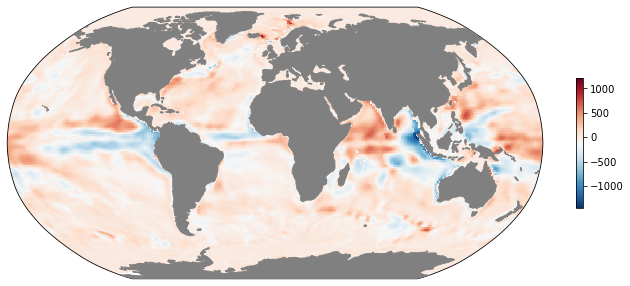

In [22]:
mapper(conv_circ_th_Wm2.sel(time='2014-01-15'),cmap='RdBu_r')

<GeoAxesSubplot:>

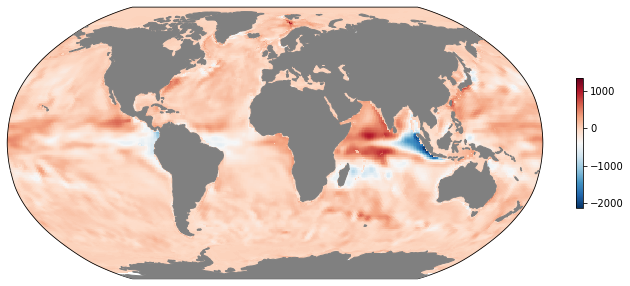

In [36]:
mapper(conv_circ_th_Wm2.sel(time='2015-01-15'),cmap='RdBu_r')

<GeoAxesSubplot:>

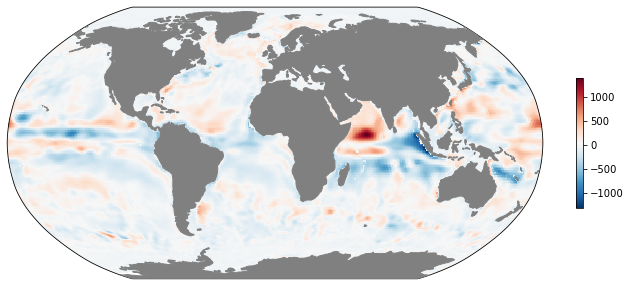

In [40]:
mapper(conv_circ_th_Wm2.sel(time='2011-01-15'),cmap='RdBu_r')

<GeoAxesSubplot:>

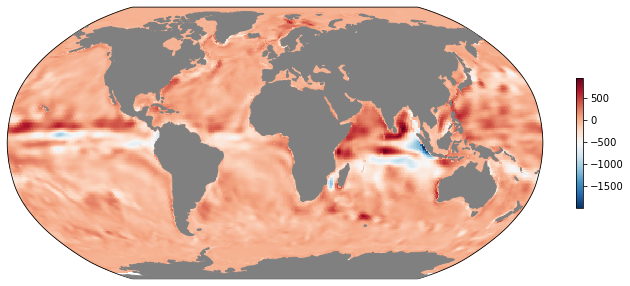

In [39]:
mapper(conv_circ_th_Wm2.sel(time='2012-01-15'),cmap='RdBu_r')

In [44]:
ecco

<module 'ecco_v4_py' from '/home/jovyan/ECCOv4-py/ECCOv4-py/ecco_v4_py/__init__.py'>

In [45]:
conv_circ_th_Wm2

<xarray.DataArray (time: 288, face: 13, j: 90, i: 90)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-2.89657763e+00, -1.11146106e+01, -1.28790212e+01, ...,
          -9.84758188e+00, -2.44325801e+00,  3.26303417e+00],
         [-2.75160968e+00, -1.13542704e+01, -1.40817531e+01, ...,
          -1.53517899e+01, -1.07399990e+01, -6.39260134e+00],
         [-2.05878055e-01, -1.01273573e+01, -1.43354579e+01, ...,
          -1.95870180e+01, -1.68259431e+01, -1.38420700e+01]],

        [[ 4.48088244e+00, -1.73519577e+00, -1.97036880e+00, ...,
          -1.92564711e+01, -1.57378936e+01, -1.03176857e+01],
         [ 7.49721659e+00,  7.68982831e+00,  1.37157741e+01, ...,
          -1.92527052e+01, -1.54974937e+01, -6.59626919e+00],
         [ 1.12201465e+01,  1.42678016e+01,  1.19142362e+01, ...,
          -2.04034630e+01, -1.60340745e+01, -7.80541010e+00],
...
         [ 2.48085417e+02,  1.84294535e+02,  1.18032925e+02, ...,
           2.53569191e+01,  7.60357614e+00, -3.89831399e+00],
         [ 2.43702651e+02,  1.83795321e+02,  1.26498949e+02, ...,
           2.56365487e+01,  2.72787162e+01,  2.73295268e+01],
         [ 2.52693009e+02,  1.92734335e+02,  1.32354151e+02, ...,
           1.60148563e+01,  3.56013772e+01,  5.06311341e+01]],

        [[ 1.89931479e+01,  3.10437031e+01,  5.39421685e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.80136963e+01,  7.40049046e+01,  9.37598499e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.04966256e+01,  8.92930564e+01,  1.15431019e+02, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-2.67514651e+00,  2.50803582e+01,  8.48578030e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.79453700e+01,  3.67925600e+01,  6.35329769e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 5.96132947e+01,  6.35997576e+01,  6.75179820e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]]])
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [48]:
coords['XC']

<xarray.DataArray 'XC' (face: 13, j: 90, i: 90)>
dask.array<xarray-XC, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
Attributes:
    coordinate:     YC XC
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [38]:
1

1

Text(0.5, 1.0, '2012-01-15T00:00:00.000000000')

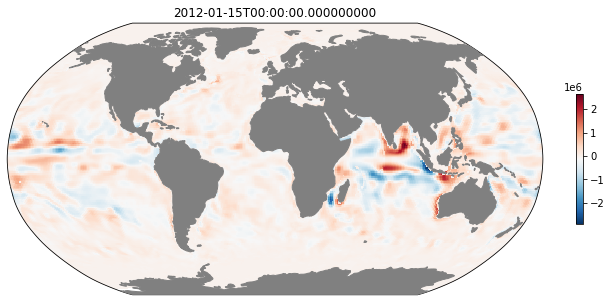

In [50]:
mapper(conv_ADV_th_anom_NA.isel(time=1),cmap='RdBu_r')
plt.title(conv_ADV_th_anom_NA.isel(time=1).time.values)

Text(0.5, 1.0, '2015-01-15T00:00:00.000000000')

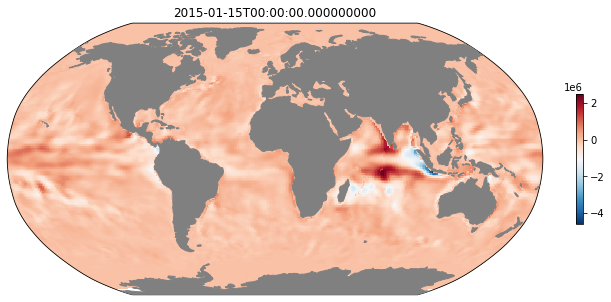

In [51]:
mapper(conv_ADV_th_anom_NA.isel(time=4),cmap='RdBu_r')
plt.title(conv_ADV_th_anom_NA.isel(time=4).time.values)

In [63]:
'%s' % conv_circ_th_anom_NA_Wm2.isel(time=0).time.values

'2011-01-15T00:00:00.000000000'

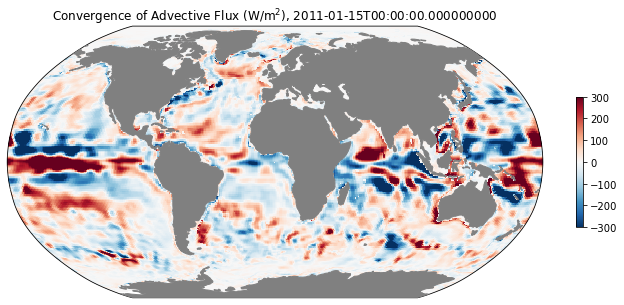

In [64]:
idx = 0
ax = mapper(conv_circ_th_anom_NA_Wm2.isel(time=idx), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Convergence of Advective Flux (W/m$^2$), %s' % conv_circ_th_anom_NA_Wm2.isel(time=idx).time.values);

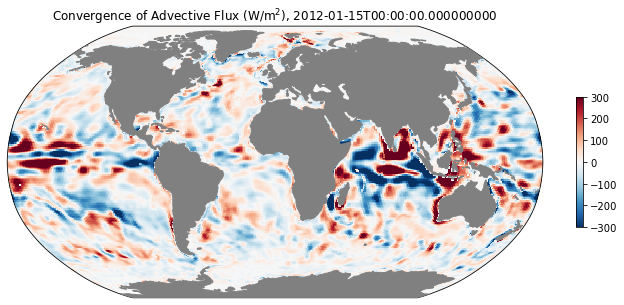

In [65]:
idx = 1
ax = mapper(conv_circ_th_anom_NA_Wm2.isel(time=idx), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Convergence of Advective Flux (W/m$^2$), %s' % conv_circ_th_anom_NA_Wm2.isel(time=idx).time.values);

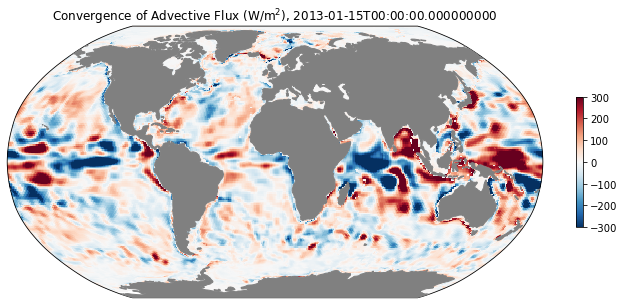

In [66]:
idx = 2
ax = mapper(conv_circ_th_anom_NA_Wm2.isel(time=idx), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Convergence of Advective Flux (W/m$^2$), %s' % conv_circ_th_anom_NA_Wm2.isel(time=idx).time.values);

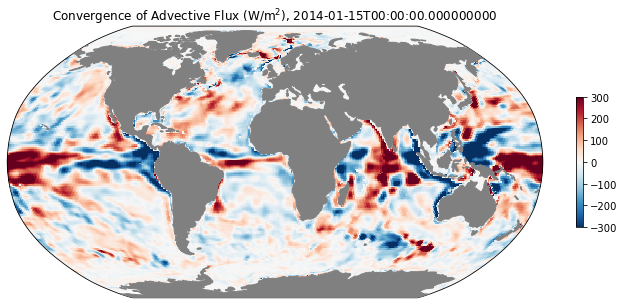

In [67]:
idx = 3
ax = mapper(conv_circ_th_anom_NA_Wm2.isel(time=idx), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Convergence of Advective Flux (W/m$^2$), %s' % conv_circ_th_anom_NA_Wm2.isel(time=idx).time.values);

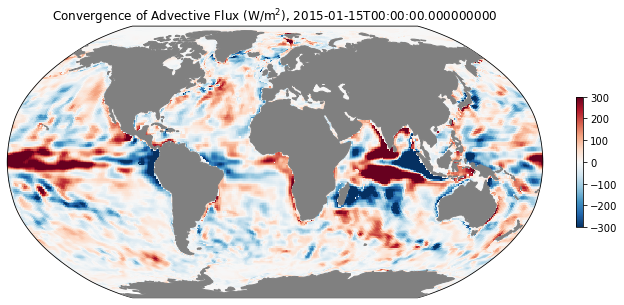

In [68]:
idx = 4
ax = mapper(conv_circ_th_anom_NA_Wm2.isel(time=idx), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Convergence of Advective Flux (W/m$^2$), %s' % conv_circ_th_anom_NA_Wm2.isel(time=idx).time.values);

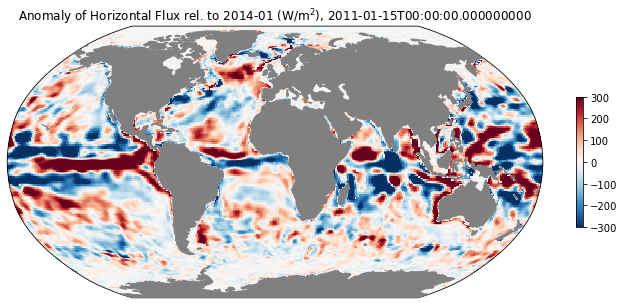

In [73]:
idx = 0
ax = mapper((conv_circ_th_anom_NA_Wm2 - conv_circ_th_anom_NA_Wm2.sel(time='2014-01-15')).isel(time=idx), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Anomaly of Horizontal Flux rel. to 2014-01 (W/m$^2$), %s' % conv_circ_th_anom_NA_Wm2.isel(time=idx).time.values);

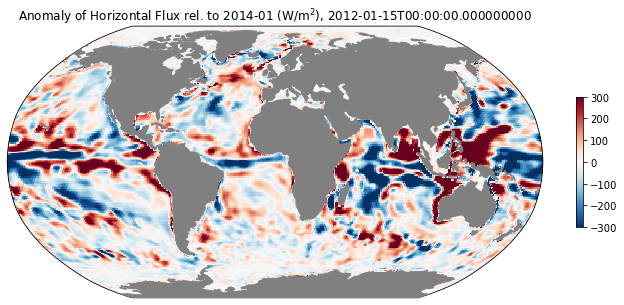

In [74]:
idx = 1
ax = mapper((conv_circ_th_anom_NA_Wm2 - conv_circ_th_anom_NA_Wm2.sel(time='2014-01-15')).isel(time=idx), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Anomaly of Horizontal Flux rel. to 2014-01 (W/m$^2$), %s' % conv_circ_th_anom_NA_Wm2.isel(time=idx).time.values);

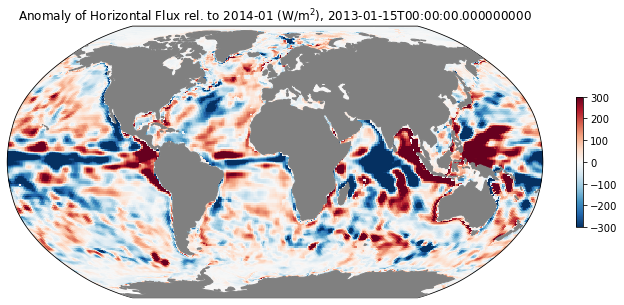

In [75]:
idx = 2
ax = mapper((conv_circ_th_anom_NA_Wm2 - conv_circ_th_anom_NA_Wm2.sel(time='2014-01-15')).isel(time=idx), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Anomaly of Horizontal Flux rel. to 2014-01 (W/m$^2$), %s' % conv_circ_th_anom_NA_Wm2.isel(time=idx).time.values);

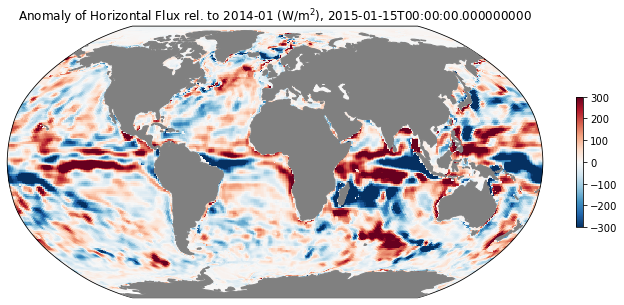

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/iostream.py", line 1391, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/srv/conda/envs/notebook/lib/python3.8/ssl.py", line 1309, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLCertVerificationError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1124)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/srv/conda/envs/notebook/lib/p

In [76]:
idx = 4
ax = mapper((conv_circ_th_anom_NA_Wm2 - conv_circ_th_anom_NA_Wm2.sel(time='2014-01-15')).isel(time=idx), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Anomaly of Horizontal Flux rel. to 2014-01 (W/m$^2$), %s' % conv_circ_th_anom_NA_Wm2.isel(time=idx).time.values);

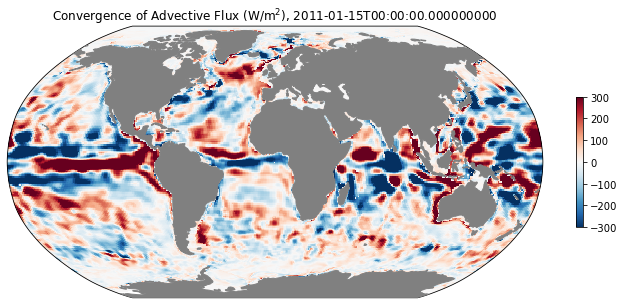

In [72]:
idx = 0
ax = mapper((conv_circ_th_anom_NA_Wm2 - conv_circ_th_anom_NA_Wm2.sel(time='2014-01-15')).isel(time=idx), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Convergence of Advective Flux (W/m$^2$), %s' % conv_circ_th_anom_NA_Wm2.isel(time=idx).time.values);

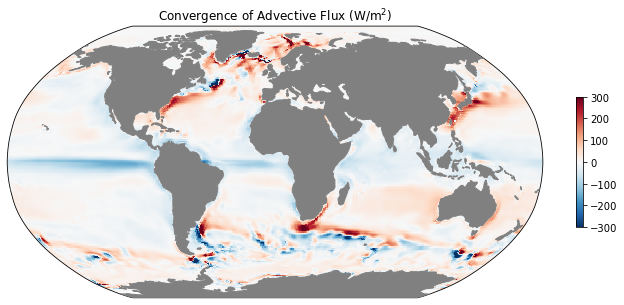

In [25]:
ax = mapper(mean_adv_conv, cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Convergence of Advective Flux (W/m$^2$)');

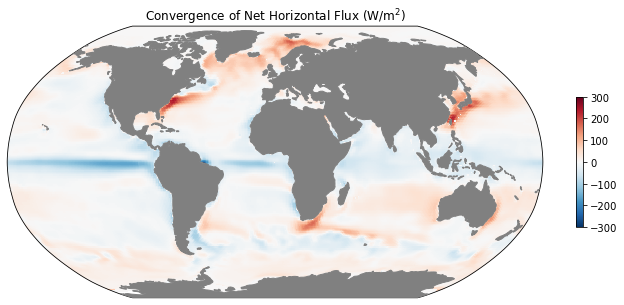

In [26]:
ax = mapper(mean_dif_conv + mean_adv_conv, cmap='RdBu_r', vmax=300, vmin=-300)
ax.set_title(r'Convergence of Net Horizontal Flux (W/m$^2$)');

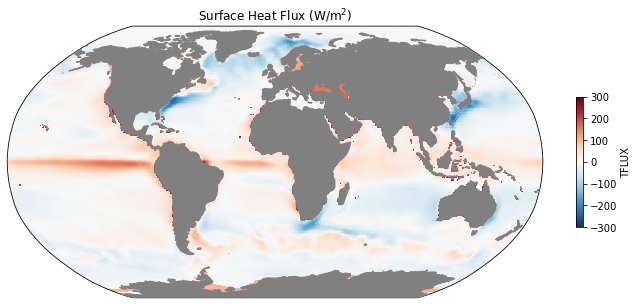

In [27]:
ax = mapper(ds.TFLUX.mean(dim='time').load(), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Surface Heat Flux (W/m$^2$)');